# Transfer Functions
- 1st order system $H(s) = \frac{1}{Ts + 1}$ 
- 1st order system with time delay $H(s) = \frac{5e^{-\tau s}}{Ts + 1}$ 
- 1st order system with an integrator $H(s) = \frac{3}{s(Ts + 1)}$ 
- 2nd order system $H(s) = \frac{4}{3s^{2} + 2s + 1}$

## Control library functions

### Functions for Model creation and Manipulation

```python
- ctl.tf(num, den)            # transfer function
- ctl.ss(A, B, C, D)          # state space
- ctl.c2d(sys, Ts)            # continuous to discrete
- ctl.d2c(sys)                # discrete to continuous
- ctl.feedback(sys)           # feedback system
- ctl.tf2ss(sys)              # transfer function to state space
- ctl.ss2tf(sys)              # state space to transfer function
- ctl.series(sys1, sys2)      # series connection
- ctl.parallel(sys1, sys2)    # parallel connection
- ctl.pade(Ts, n)             # pade approximation
```
### Functions for Model Simulation

```python
- ctl.step_response(sys)                # step response
- ctl.lsim(sys, u, t)                   # linear simulation
- ctl.forced_response(sys, t, u0, X0)   # forced response
- ctl.initial_response(sys, t, X0)      # initial response
- ctl.impulse_response(sys)             # impulse response
```

### Functions for Analysis

```python
- ctl.step_info(sys)                    # step response info
- ctl.pole(sys)                         # poles of system
- ctl.zero(sys)                         # zeros of system
- ctl.damp(sys)                         # damping ratio
- ctl.pzmap(sys)                        # pole-zero map
- ctl.bode(sys)                         # bode plot
- ctl.stability_margins(sys)            # stability margins
- ctl.margin(sys)                       # stability margins
```





In [6]:
import numpy as np
import control as ctl
import math

######### Control Library #########

# 1st order system
num = np.array([1])
den = np.array([3, 1])

H = ctl.tf(num,den)
print("H(s) = ", H)

# 1st order system with integrator
num = np.array([3])
den = np.array ([2,1,0])    #s(2s + 1) = 2s^2 + s

H = ctl.tf(num,den)
print("H(s) = ", H)

# 1st order system with time delay
num_1= np.array([3])
den_1 = np.array([4,2])
H_1 = ctl.tf(num_1, den_1)
print("H1 = ", H_1)


num_2 = math.exp(-math.tau * 3)
den_2 = 1

H_2 = ctl.tf(num_2, den_2)
print("H2 = ", H_2)



# 2nd order system
num = np.array([3])
den = np.array([3,-2,1])

H = ctl.tf(num,den)
print("H(s) = ", H)


H(s) =  
   1
-------
3 s + 1

H(s) =  
    3
---------
2 s^2 + s

H1 =  
   3
-------
4 s + 2

H2 =  
6.512e-09
---------
    1

H(s) =  
       3
---------------
3 s^2 - 2 s + 1



H(s) =  TransferFunctionContinuous(
array([1.]),
array([1.        , 0.33333333]),
dt: None
)


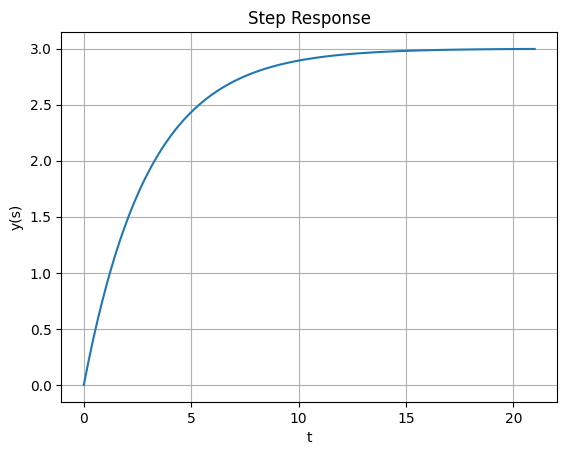

In [9]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import math

########### Scipy.Signal ############

K = 3
T = 3

num = np.array([K])
den = np.array([T, 1])

H = sig.TransferFunction(num,den)
print("H(s) = ", H)

# Step response
t,y = sig.step(H)

# Plotting
plt.plot(t,y)
plt.title("Step Response")
plt.xlabel("t")
plt.ylabel("y(s)")
plt.grid()
plt.show()






